In [23]:
import math

import matplotlib.pyplot as plt
import pandas as pd

from notebooks.analytics.utils import init_analysis, boxplot_metric, savefig, set_save_folder

In [24]:
COMPARABLE = [
    ("fed_avg_01", "daeclust_10"), # MNIST, LENET, 19 partitions
    ("fed_avg_08", "daeclust_2000_05"), # MNIST-FMNIST, LENET, 19 parititions
    ("fed_avg_02", "daeclust_2000_07"), # MNIST, LENET, 19 parititions, sliced 0,3,6
    ("fed_avg_05", "daeclust_09"), # MNIST, CAE_LENET, 38 parititions
]

COMPARE_INDEX = 2

EXP_FED_AVG = COMPARABLE[COMPARE_INDEX][0]
EXP_DECLUST = COMPARABLE[COMPARE_INDEX][1]
(EXP_FED_AVG, EXP_DECLUST)

('fed_avg_02', 'daeclust_2000_07')

In [25]:
fed_avg = init_analysis(EXP_FED_AVG)
declust = pd.concat([
    init_analysis(f"{EXP_DECLUST}-clusters"),
    init_analysis(f"{EXP_DECLUST}-clusters-selection")
])
set_save_folder("comparison")

C:\Users\micdu\AppData\Local\Temp\ipykernel_28520\2286273525.py:35: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  declust.groupby(["round_id", "trainer_id"]).max(), metric)
C:\Users\micdu\AppData\Local\Temp\ipykernel_28520\2286273525.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


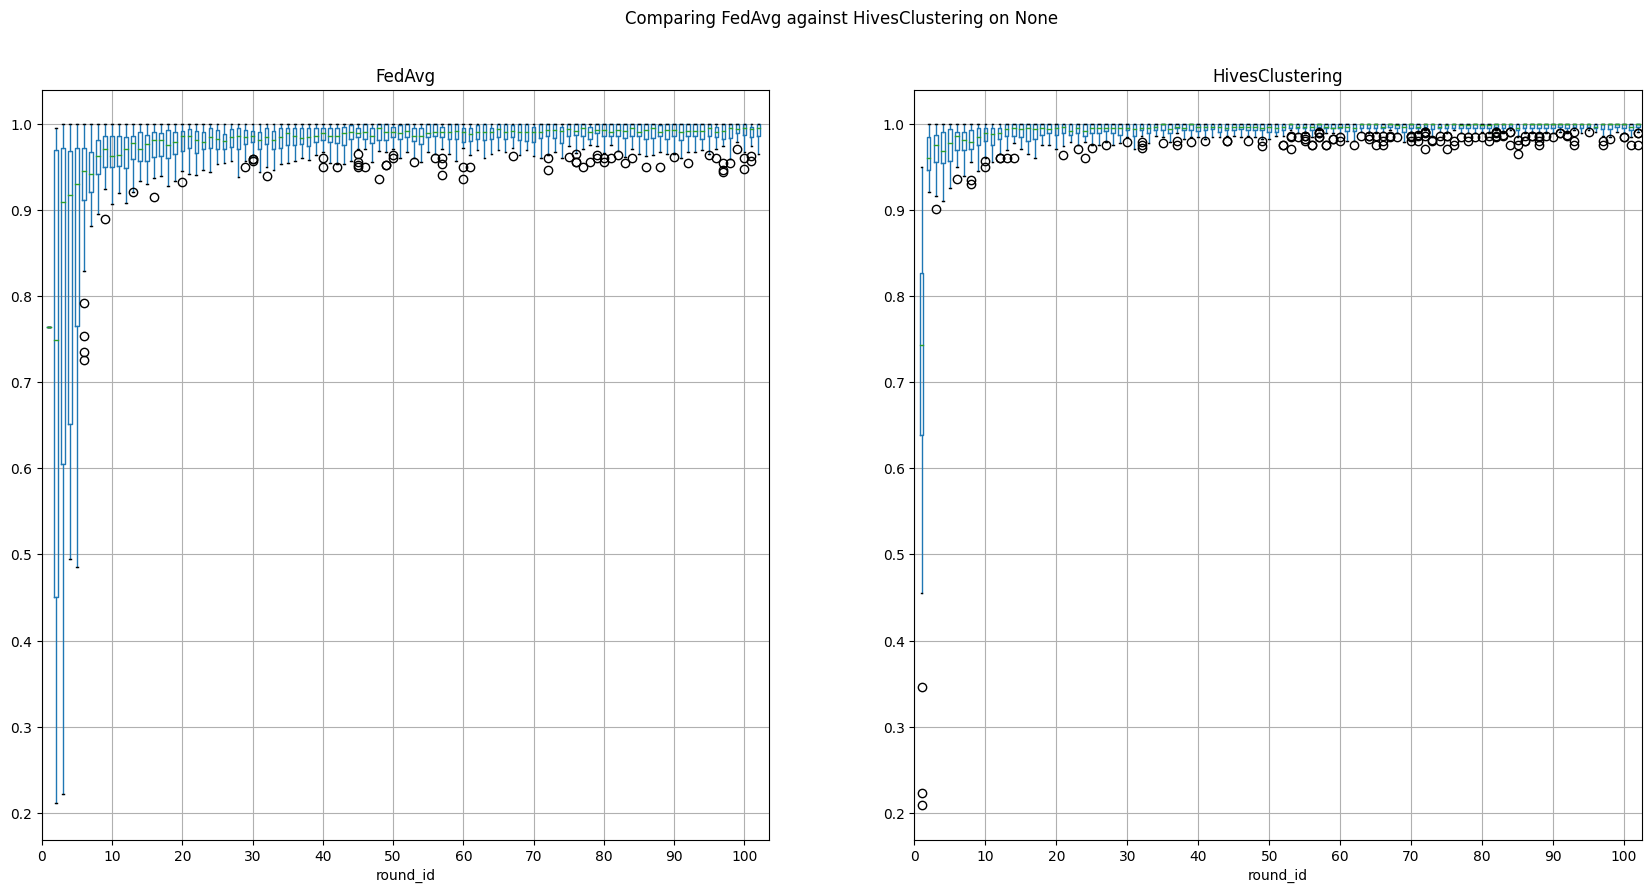

In [26]:
def boxplot_from_df(ax, df, column, xticks, title):
        plot_ax = df.boxplot(column, by="round_id", ax=ax)
        plot_ax.set_xticks(xticks, xticks)
        plot_ax.set_title(title)
        return plot_ax

def compare(df_0, df_1, column, dataset=None):
    data_0 = df_0.reset_index()
    data_1 = df_1.reset_index()
    max_round = data_1.round_id.max()
    xticks = range(0, int(max_round), math.floor(max_round/10))
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 2, 1)
    boxplot_from_df(ax, data_0, column, xticks, f"FedAvg")
    ax = fig.add_subplot(1, 2, 2, sharey=ax)
    boxplot_from_df(ax, data_1, column, xticks, f"HivesClustering")
    fig.suptitle(f'Comparing FedAvg against HivesClustering on {dataset}')
    return fig

def plot_compare(metric):
    datasets = fed_avg.dataset.unique()
    if len(datasets) > 1:
        for dataset in datasets:
            fig = compare(
                fed_avg.loc[fed_avg.dataset == dataset].groupby(["round_id", "trainer_id"]).max(),
                declust.loc[declust.dataset == dataset].groupby(["round_id", "trainer_id"]).max(),
                metric,
                dataset=dataset
            )
            savefig(fig, f"{dataset}-{metric}--{EXP_FED_AVG}--{EXP_DECLUST}")
            fig.show()
    else:
        fig = compare(
            fed_avg.groupby(["round_id", "trainer_id"]).max(),
            declust.groupby(["round_id", "trainer_id"]).max(), metric)
        savefig(fig, f"{datasets[0]}-{metric}--{EXP_FED_AVG}--{EXP_DECLUST}")
        fig.show()
plot_compare("validation_acc")

C:\Users\micdu\AppData\Local\Temp\ipykernel_28520\2286273525.py:35: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  declust.groupby(["round_id", "trainer_id"]).max(), metric)
C:\Users\micdu\AppData\Local\Temp\ipykernel_28520\2286273525.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


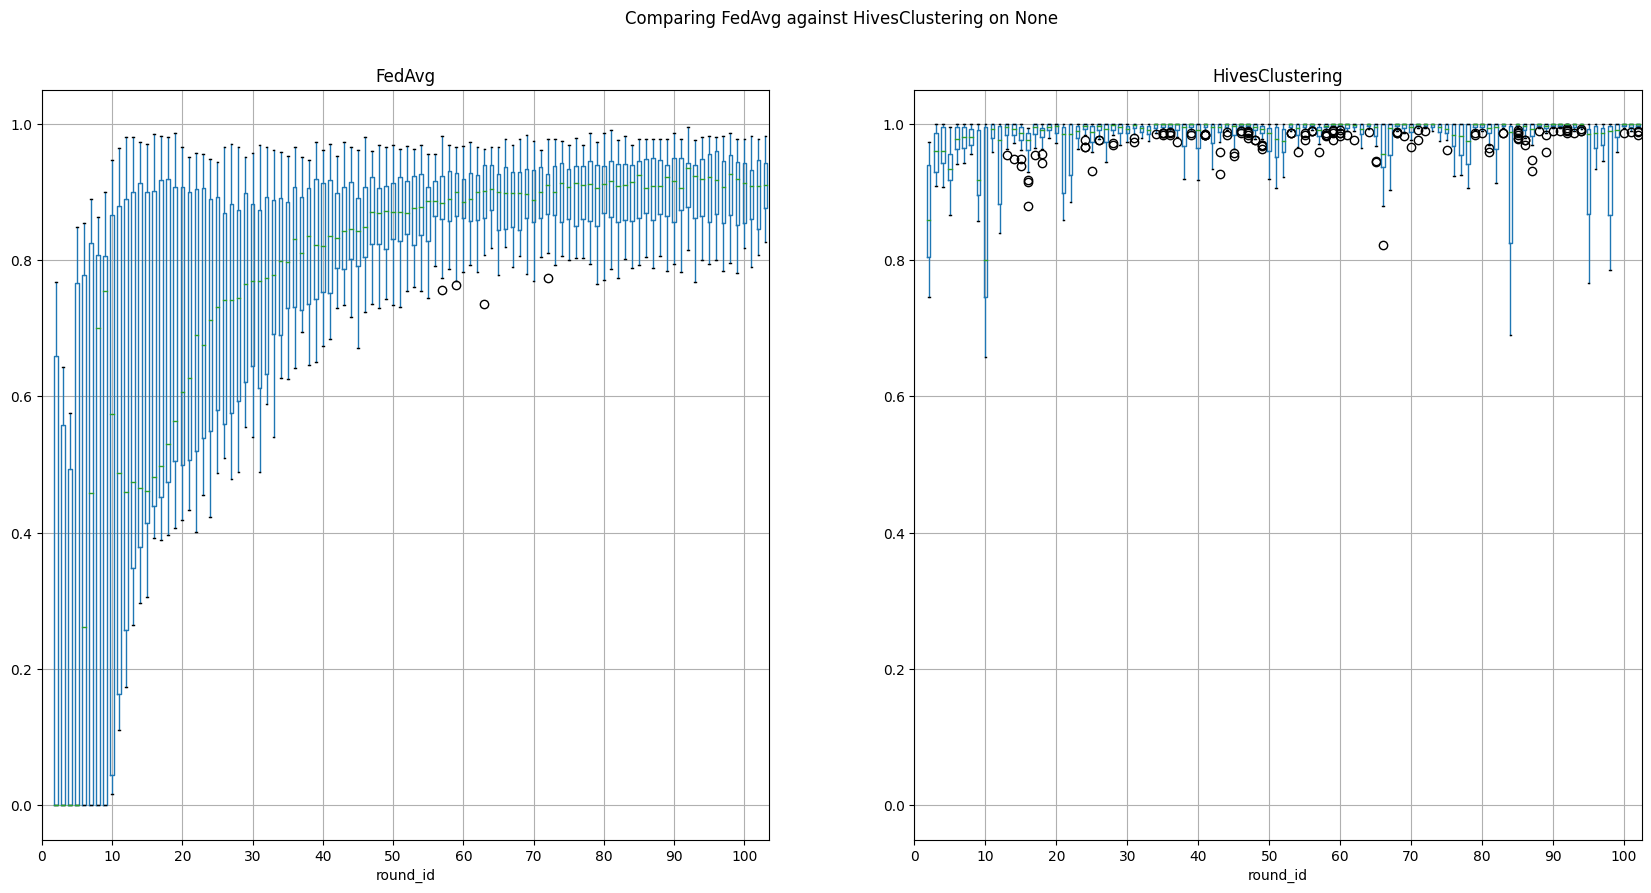

In [27]:
plot_compare("test_acc")